
# Single Qubit Weak Measurement Simulation

This notebook illustrates a Monte–Carlo simulation of a single qubit
undergoing repeated weak measurements. We implement the measurement
protocol using diagonal Kraus operators and track the resulting
stochastic evolution of the state as well as the entropy production
quantity $Q$. The simulation is based on the measurement-only
dynamics discussed in Appendix A of Turkeshi et al. and compared
to the distribution predicted in the Arrow of Time paper.


In [29]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Import simulation functions from our module
from qubit_measurement_simulation import (
    run_trajectory,
    simulate_Q_distribution,
    eq14_pdf,
    fit_eq14,
    plot_Q_fit
)

# Ensure plots display inline
%matplotlib inline


## Simulating a single trajectory

We simulate a single trajectory of $N$ weak measurements. Each measurement step
has a random outcome $\xi_i \in \{\pm 1\}$, drawn according to the Born
probabilities determined by the current state. The post–measurement state is
normalised and used to compute the expectation value $\langle\sigma_z\rangle$.
The cell below runs one trajectory and plots the expectation values and
measurement outcomes as functions of the step index.


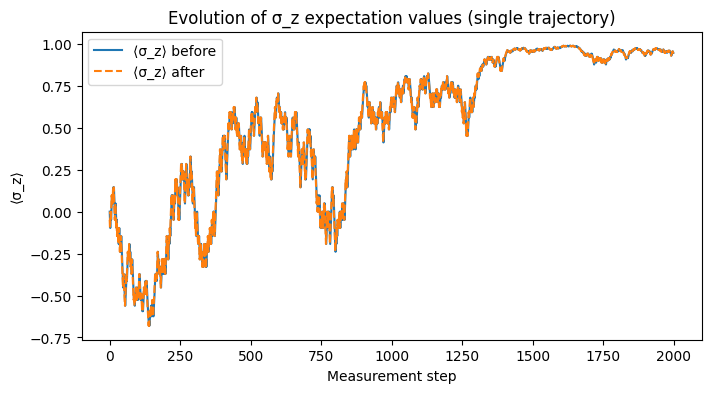

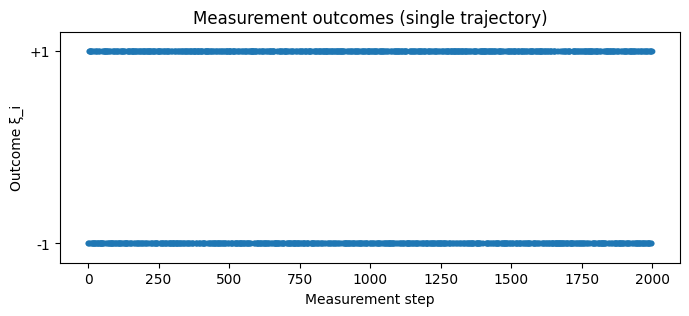

48.57243469265067

In [24]:
# Parameters for a single trajectory
N = 2000
epsilon = 0.05

# Run the trajectory
result = run_trajectory(N, epsilon)

# Plot expectation values before and after each measurement
steps = np.arange(N)
plt.figure(figsize=(8, 4))
plt.plot(steps, result.zs_before, label="⟨σ_z⟩ before")
plt.plot(steps, result.zs_after, label="⟨σ_z⟩ after", linestyle="--")
plt.xlabel("Measurement step")
plt.ylabel("⟨σ_z⟩")
plt.title("Evolution of σ_z expectation values (single trajectory)")
plt.legend()
plt.show()

# Plot measurement outcomes
plt.figure(figsize=(8, 3))
plt.scatter(steps, result.outcomes, s=10)
plt.xlabel("Measurement step")
plt.ylabel("Outcome ξ_i")
plt.yticks([-1, 1], labels=["-1","+1"])
plt.ylim(-1.2, 1.2)
plt.title("Measurement outcomes (single trajectory)")
plt.show()

# Display entropy production
result.Q


## Distribution of entropy production

Next we run many independent trajectories to build the distribution of the
entropy production $Q$. According to the Arrow of Time paper, the scaled
distribution should follow Eq.(14) with a parameter $\theta = T/\tau$.
We estimate $\theta$ from the simulated data by fitting the histogram.


In [30]:
# Ensemble parameters
num_traj = 5000  # number of trajectories
N = 200         # number of measurements per trajectory
epsilon = 0.05  # measurement strength

# Simulate Q distribution
Q_vals = simulate_Q_distribution(num_traj, N, epsilon, seed=123)

# Compute basic statistics
mean_Q = np.mean(Q_vals)
std_Q = np.std(Q_vals)
print(f"⟨Q⟩ = {mean_Q:.2f} ± {std_Q:.2f}")

⟨Q⟩ = 11.97 ± 13.57



## Fitting to Eq.(14)

We now fit the empirical distribution to Eq.(14) from the Arrow of Time
paper. The function $p(x;\theta)$ is defined in the module. We use a
nonlinear least–squares fit to determine the best–fit value of $\theta$.


In [31]:
# Fit the distribution to Eq.(14)
theta_hat, theta_err = fit_eq14(Q_vals)
print(f'T/tau = {theta_hat:.2f} ± {theta_err:.2f}')

T/tau = 2.31 ± 0.35


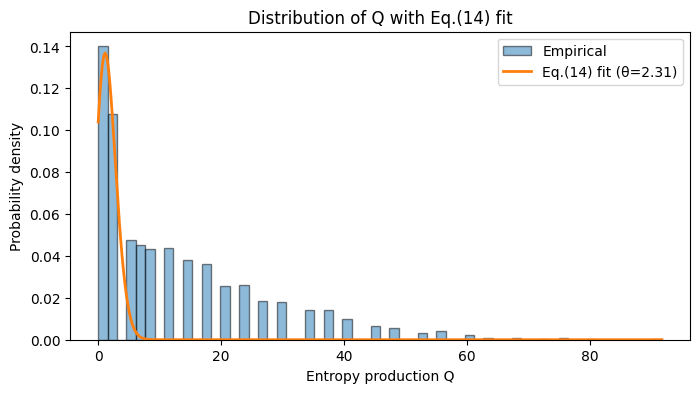

In [32]:
# Plot the histogram and fitted distribution
plt.figure(figsize=(8, 4))
hist, bins, _ = plt.hist(Q_vals, bins=60, density=True, alpha=0.5, edgecolor="black", label="Empirical")
x = np.linspace(min(Q_vals), max(Q_vals), 400)
y = eq14_pdf(x, theta_hat)
plt.plot(x, y, label=f"Eq.(14) fit (θ={theta_hat:.2f})", linewidth=2)
plt.xlabel("Entropy production Q")
plt.ylabel("Probability density")
plt.title("Distribution of Q with Eq.(14) fit")
plt.legend()
plt.show()


## small epsilon simulation

To examine how the distribution evolves with the size of epsilon, we change $\epsilon=0.005$
while keeping the trajectory length to $N=200$. We again compute
the distribution of $Q$ and fit to Eq.(14).


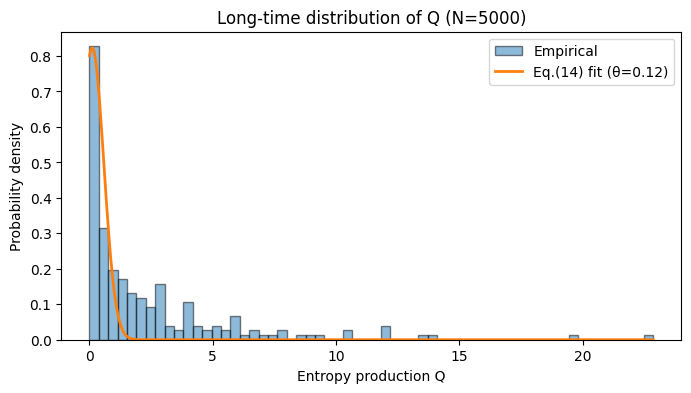

T/tau = 0.12 ± 0.02


In [33]:
# Parameters for long-time simulation
N_long = 5000
num_long = 200
epsilon = 0.0005

Q_long = simulate_Q_distribution(num_long, N_long, epsilon, seed=42)
theta_long, theta_long_err = fit_eq14(Q_long)

# Plot histogram and fit
plt.figure(figsize=(8, 4))
plt.hist(Q_long, bins=60, density=True, alpha=0.5, edgecolor="black", label="Empirical")
x = np.linspace(min(Q_long), max(Q_long), 400)
plt.plot(x, eq14_pdf(x, theta_long), label=f"Eq.(14) fit (θ={theta_long:.2f})", linewidth=2)
plt.xlabel("Entropy production Q")
plt.ylabel("Probability density")
plt.title(f"Long-time distribution of Q (N={N_long})")
plt.legend()
plt.show()

print(f'T/tau = {theta_long:.2f} ± {theta_long_err:.2f}')


## Summary

We implemented a discrete-time simulation of a single qubit undergoing weak measurements with no
unitary dynamics. The measurement outcomes were encoded as $\xi_i \in \{\pm 1\}$ and the entropy
production $Q$ was computed for each trajectory. The empirical distribution of $Q$ was compared
with the analytical prediction given by Eq.(14) of the Arrow of Time paper. For the chosen
parameters ($\epsilon=0.05$) the fitted parameter $\theta$ was of order unity. Increasing the
trajectory length to 1000 steps resulted in a broader distribution and a larger fitted value
of $\theta$, consistent with the interpretation that $\theta$ scales with the effective time of
monitoring. Future work could explore different values of $\epsilon$, include unitary dynamics
between measurements, or extend the simulation to multi-qubit systems to investigate
measurement-induced entanglement transitions.
